In [1]:
movie = pd.read_csv('./datas/final_movie_Rev4.csv', index_col=[0])
movie

,Movie,Distributor,Screen,Sales,Audience,Genre,Rate,Year,Month,Season
0,명량,씨제이이앤엠(주),1587,135748.398910,17613.682,사극,15세이상관람가,2014,7,3
1,극한직업,씨제이이앤엠(주),1978,139647.979516,16264.944,코미디,15세이상관람가,2019,1,1
2,신과함께-죄와 벌,롯데쇼핑㈜롯데엔터테인먼트,1912,115698.654137,14410.754,판타지,12세이상관람가,2017,12,1
3,국제시장,씨제이이앤엠(주),966,110828.014630,14245.998,드라마,12세이상관람가,2014,12,1
4,베테랑,씨제이이앤엠(주),1064,105024.756250,13395.400,액션,15세이상관람가,2015,8,3
...,...,...,...,...,...,...,...,...,...,...
806,은교,롯데쇼핑㈜롯데엔터테인먼트,521,9917.728000,1346.274,멜로/로맨스,청소년관람불가,2012,4,2
807,마담 뺑덕,씨제이이앤엠(주),536,3685.882590,465.749,멜로/로맨스,청소년관람불가,2014,10,4
808,나의 PS 파트너,씨제이이앤엠(주),552,13845.218616,1823.116,멜로/로맨스,청소년관람불가,2012,12,1
809,연애의 온도,롯데쇼핑㈜롯데엔터테인먼트,567,13798.864446,1865.195,멜로/로맨스,청소년관람불가,2013,3,2


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 0 to 810
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie        811 non-null    object 
 1   Distributor  811 non-null    object 
 2   Screen       811 non-null    int64  
 3   Sales        811 non-null    float64
 4   Audience     811 non-null    float64
 5   Genre        811 non-null    object 
 6   Rate         811 non-null    object 
 7   Year         811 non-null    int64  
 8   Month        811 non-null    int64  
 9   Season       811 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
numerics = ['int64', 'float64']
movie_train = movie.select_dtypes(include=numerics)

In [6]:
X = movie_train.drop(['Sales', 'Audience'], axis=1)
y = movie_train['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [7]:
X

,Screen,Year,Month,Season
0,1587,2014,7,3
1,1978,2019,1,1
2,1912,2017,12,1
3,966,2014,12,1
4,1064,2015,8,3
...,...,...,...,...
806,521,2012,4,2
807,536,2014,10,4
808,552,2012,12,1
809,567,2013,3,2


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [9]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  11924.700646196408
RMSE of Test Data :  13207.672073229283


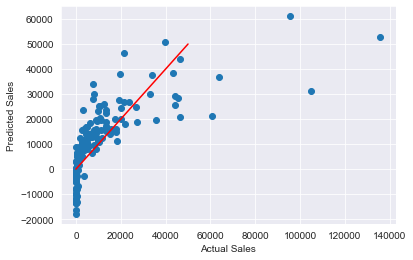

In [11]:
sns.set_style('darkgrid')
plt.scatter(y_test, pred_test)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.plot([0,50000], [0,50000], 'r');

In [181]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=13)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=13)

In [182]:
pred_tr = tree_reg.predict(X_train)
pred_test = tree_reg.predict(X_test)
r2_tr = (r2_score(y_train, pred_tr))
r2_test = (r2_score(y_test, pred_test))

print("R2 of train : ", r2_tr)
print("R2 of test : ", r2_test)

R2 of train :  1.0
R2 of test :  0.9930427484131645


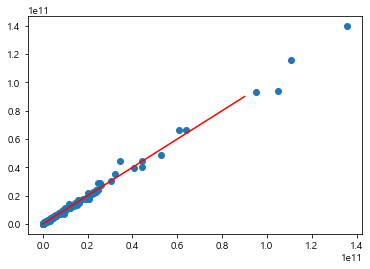

In [183]:
plt.scatter(y_test, pred_test)
plt.plot([0,90000000000], [0,90000000000], 'r');

In [185]:
X = movie_train.drop(['Sales', 'log_sales', 'Audience', 'log_audience'], axis=1)
y = movie_train['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)

In [186]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [187]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
r2_tr = (r2_score(y_train, pred_tr))
r2_test = (r2_score(y_test, pred_test))

print("R2 of train : ", r2_tr)
print("R2 of test : ", r2_test)

R2 of train :  0.5873157914025386
R2 of test :  0.6172626271241126


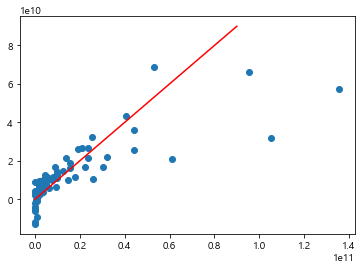

In [188]:
plt.scatter(y_test, pred_test)
plt.plot([0,90000000000], [0,90000000000], 'r');

In [189]:
tree_reg = DecisionTreeRegressor(random_state=13)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=13)

In [190]:
pred_tr = tree_reg.predict(X_train)
pred_test = tree_reg.predict(X_test)
r2_tr = (r2_score(y_train, pred_tr))
r2_test = (r2_score(y_test, pred_test))

print("R2 of train : ", r2_tr)
print("R2 of test : ", r2_test)

R2 of train :  0.9999999999997587
R2 of test :  0.6921745210731397


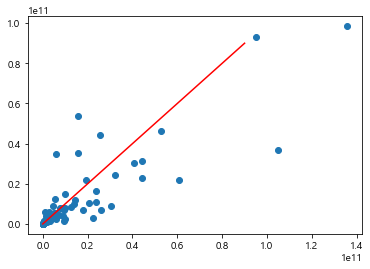

In [191]:
plt.scatter(y_test, pred_test)
plt.plot([0,90000000000], [0,90000000000], 'r');

In [193]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

randFor = RandomForestRegressor(random_state=13, n_estimators=35, max_depth=15)
randFor.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=35, random_state=13)

In [194]:
pred_tr = randFor.predict(X_train)
pred_test = randFor.predict(X_test)
r2_tr = (r2_score(y_train, pred_tr))
r2_test = (r2_score(y_test, pred_test))

print("R2 of train : ", r2_tr)
print("R2 of test : ", r2_test)

R2 of train :  0.9483672041739897
R2 of test :  0.707184319487462
